# Group Working Assignment

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

## 2. Import data

In [2]:
url="https://avoidatastr.blob.core.windows.net/avoindata/AvoinData/8_Tyo_ja_talous/Tyopaikkaprojektio/TP_tilasto_proj_1980_2030.XLS"
file=pd.read_excel(url)

In [3]:
file.head()

,Toimiala,Tol,Tyyppi,Vuosi,Uusimaa,Hel,Esp,Van,Kau,PKS,...,Por_p,Sip_p,Tuu_p,Vih_p,Kehys_p,Raas_p,Lohj_p,Lovi_p,Porv_p,Riih_p
0,Toimialat yhteensä,0,Tilasto,1980,558332.0,324152.0,50515.0,43671.0,1991.0,420329.0,...,0.128597,0.695106,1.357257,1.064062,11.831133,3.752427,3.643352,1.734810,3.755293,2.846514
1,Toimialat yhteensä,0,Interpoloitu,1981,571505.6,330042.4,53523.4,46063.2,1996.6,431625.6,...,0.127453,0.688007,1.388123,1.064242,11.866445,3.659212,3.605389,1.667700,3.676954,2.782475
2,Toimialat yhteensä,0,Interpoloitu,1982,584679.2,335932.8,56531.8,48455.4,2002.2,442922.2,...,0.126360,0.681228,1.417598,1.064413,11.900167,3.570197,3.569137,1.603614,3.602146,2.721321
3,Toimialat yhteensä,0,Interpoloitu,1983,597852.8,341823.2,59540.2,50847.6,2007.8,454218.8,...,0.125315,0.674748,1.445774,1.064576,11.932402,3.485105,3.534482,1.542353,3.530635,2.662863
4,Toimialat yhteensä,0,Interpoloitu,1984,611026.4,347713.6,62548.6,53239.8,2013.4,465515.4,...,0.124315,0.668547,1.472735,1.064733,11.963247,3.403683,3.501322,1.483733,3.462207,2.606925


Excel data showing the number of jobs by municipality / region and industry by sector in 1980-2017 and the projection of job development in the same regions in 2018-2035. 

## 3. Structure of Data

In [4]:
file.shape

(459, 48)

In [5]:
file.columns

Index(['Toimiala', 'Tol', 'Tyyppi', 'Vuosi', 'Uusimaa', 'Hel', 'Esp', 'Van',
       'Kau', 'PKS', 'Hyv', 'Jar', 'Ker', 'Kir', 'Man', 'Nur', 'Por', 'Sip',
       'Tuu', 'Vih', 'Kehys', 'Raas', 'Lohj', 'Lovi', 'Porv', 'Riih',
       'Uusimaa_p', 'Hel_p', 'Esp_p', 'Van_p', 'Kau_p', 'PKS_p', 'Hyv_p',
       'Jar_p', 'Ker_p', 'Kir_p', 'Man_p', 'Nur_p', 'Por_p', 'Sip_p', 'Tuu_p',
       'Vih_p', 'Kehys_p', 'Raas_p', 'Lohj_p', 'Lovi_p', 'Porv_p', 'Riih_p'],
      dtype='object')

The columns of the dataset contains Finnish words. The first four column name should be translated to English. In which, TOL represents the classification of economy activities.

 Others are city or area names of Uusima region. Note that
- PKS represents Pääkaupunkiseutu, which include the Helsinki (Hel), Espoo (Esp), Vantaa (Van), and Kauniainen (Kau) areas. 
- Kuuma-kunnat (Kehys) include Hyvinkää (Hyv), Järvenpää (Jar), Kirkkonummi (Kir), Kerava (Ker), Mäntsälä (Man), Nurmijärvi (Nur), Pornainen (Por), Sipoo (Sip), Tuusula (Tuu) and Vihti (Vih).
- Riihimäen seutu (Riih) is actually not in the Uusimaa region (or included in the data in other areas), the column of Riih and Riih_p can be deleted.

The column with city name represents the number of jobs, the city names ith _p represents jobs percentage.

The number of jobs and the percentage in the above columns are the summation of the columns labeled with city names which include. For example:

In [6]:
print((file['Hel']+file['Esp']+file['Van']+file['Kau']-file['PKS']).value_counts())
print((file['Hyv']+file['Jar']+file['Kir']+file['Ker']+file['Man']+file['Nur']+file['Por']+file['Sip']+file['Tuu']+file['Vih']\
       -file['Kehys']).value_counts())

 0.000000e+00    453
-1.164153e-10      3
 1.164153e-10      3
dtype: int64
 0.000000e+00    415
 3.637979e-12      9
 1.818989e-12      8
 9.094947e-13      5
-9.094947e-13      5
-1.818989e-12      4
-1.455192e-11      3
 1.455192e-11      3
 7.275958e-12      2
 4.547474e-13      2
-3.637979e-12      2
-2.910383e-11      1
dtype: int64


Another important point:
- Riihimäen seutu (Riih) is actually not in the Uusimaa region (or included in the data in other areas), the column of Riih and Riih_p was ignored- in our analysis.

The full employment percentage of the UUsimaa region does not include Riih_p column.

In [7]:
file['PKS_p']+file['Kehys_p']+file['Raas_p']+file['Lohj_p']+file['Lovi_p']+file['Porv_p']

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
454    100.0
455    100.0
456    100.0
457    100.0
458    100.0
Length: 459, dtype: float64

**Important note:** 
- **PKS**, **PKS_p** and **Kehys**, **Kehys_p** columns should be treated carefully. For finding summation, maximum, minimum, (and so on) purposes, these columns were ignored. But these columns can be usefull in analysis terms of areas in the UUsimaa regions.

In [8]:
file[['Toimiala','Tyyppi']]

,Toimiala,Tyyppi
0,Toimialat yhteensä,Tilasto
1,Toimialat yhteensä,Interpoloitu
2,Toimialat yhteensä,Interpoloitu
3,Toimialat yhteensä,Interpoloitu
4,Toimialat yhteensä,Interpoloitu
...,...,...
454,Muut palvelut,Projektio
455,Muut palvelut,Projektio
456,Muut palvelut,Projektio
457,Muut palvelut,Projektio


The elements in the above two columns were also translated.

## 4. Data Cleaning

### 1) Translating column names

In [9]:
new_column_names={'Toimiala':'Industry','Tyyppi':'Type','Vuosi':'Year'}
file.rename(columns=new_column_names,inplace=True)

### 2) Translating the elements in Industry column

In [10]:
file['Industry'].unique()

array(['Toimialat yhteensä', 'Alkutuotanto', 'Teollisuus', 'Rakentaminen',
       'Kauppa sekä majoitus- ja ravitsemisala', 'Kuljetus',
       'Liike-elämän palvelut, informaatioalat, rahoitus',
       'Julkinen hallinto ja hyvinvointipalvelut', 'Muut palvelut'],
      dtype=object)

In [11]:
file['Industry']=file['Industry'].str.replace('Toimialat yhteensä','Total industries').str.replace('Alkutuotanto','Production')\
.str.replace('Teollisuus','Manufacture').str.replace('Rakentaminen','Construction')\
.str.replace('Kauppa sekä majoitus- ja ravitsemisala','Trade and accomodation').str.replace('Kuljetus','Transport')\
.str.replace('Liike-elämän palvelut, informaatioalat, rahoitus','Business services, information, finance')\
.str.replace('Julkinen hallinto ja hyvinvointipalvelut','Public administration and welfare services')\
.str.replace('Muut palvelut','Other services')

### 3) Translating the elements in Type column

In [12]:
file['Type'].unique()

array(['Tilasto', 'Interpoloitu', 'Ennakkoarvio', 'Projektio'],
      dtype=object)

In [13]:
file['Type']=file['Type'].str.replace('Tilasto','Statistics').str.replace('Interpoloitu','interpolated').str.replace('Ennakkoarvio','Estimates')\
.str.replace('Projektio','Projection')

In [14]:
file.head()

,Industry,Tol,Type,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,...,Por_p,Sip_p,Tuu_p,Vih_p,Kehys_p,Raas_p,Lohj_p,Lovi_p,Porv_p,Riih_p
0,Total industries,0,Statistics,1980,558332.0,324152.0,50515.0,43671.0,1991.0,420329.0,...,0.128597,0.695106,1.357257,1.064062,11.831133,3.752427,3.643352,1.734810,3.755293,2.846514
1,Total industries,0,interpolated,1981,571505.6,330042.4,53523.4,46063.2,1996.6,431625.6,...,0.127453,0.688007,1.388123,1.064242,11.866445,3.659212,3.605389,1.667700,3.676954,2.782475
2,Total industries,0,interpolated,1982,584679.2,335932.8,56531.8,48455.4,2002.2,442922.2,...,0.126360,0.681228,1.417598,1.064413,11.900167,3.570197,3.569137,1.603614,3.602146,2.721321
3,Total industries,0,interpolated,1983,597852.8,341823.2,59540.2,50847.6,2007.8,454218.8,...,0.125315,0.674748,1.445774,1.064576,11.932402,3.485105,3.534482,1.542353,3.530635,2.662863
4,Total industries,0,interpolated,1984,611026.4,347713.6,62548.6,53239.8,2013.4,465515.4,...,0.124315,0.668547,1.472735,1.064733,11.963247,3.403683,3.501322,1.483733,3.462207,2.606925


### 4) Tidy Data:
Split and combine the data to transfrom the data to a format that makes it easier to aggregate

In [15]:
file1 = file.loc[:,:'Riih'].melt(id_vars = ['Industry', 'Tol','Type','Year'], var_name = 'Area', value_name = 'Number of jobs')
file1

,Industry,Tol,Type,Year,Area,Number of jobs
0,Total industries,0,Statistics,1980,Uusimaa,558332.000000
1,Total industries,0,interpolated,1981,Uusimaa,571505.600000
2,Total industries,0,interpolated,1982,Uusimaa,584679.200000
3,Total industries,0,interpolated,1983,Uusimaa,597852.800000
4,Total industries,0,interpolated,1984,Uusimaa,611026.400000
...,...,...,...,...,...,...
10093,Other services,8,Projection,2026,Riih,910.515532
10094,Other services,8,Projection,2027,Riih,919.508197
10095,Other services,8,Projection,2028,Riih,928.500861
10096,Other services,8,Projection,2029,Riih,937.493525


In [16]:
file_per = file.loc[:,'Uusimaa_p':].melt(var_name = 'Area_p',value_name = 'Percentage')
file_per['Area_p'] = file_per['Area_p'].str.replace('_p','')
file_per

,Area_p,Percentage
0,Uusimaa,100.000000
1,Uusimaa,100.000000
2,Uusimaa,100.000000
3,Uusimaa,100.000000
4,Uusimaa,100.000000
...,...,...
10093,Riih,1.787688
10094,Riih,1.787688
10095,Riih,1.787688
10096,Riih,1.787688


In [17]:
tidy_file = pd.concat([file1, file_per], axis = 1).drop(columns = ['Area_p','Tol'])
tidy_file

,Industry,Type,Year,Area,Number of jobs,Percentage
0,Total industries,Statistics,1980,Uusimaa,558332.000000,100.000000
1,Total industries,interpolated,1981,Uusimaa,571505.600000,100.000000
2,Total industries,interpolated,1982,Uusimaa,584679.200000,100.000000
3,Total industries,interpolated,1983,Uusimaa,597852.800000,100.000000
4,Total industries,interpolated,1984,Uusimaa,611026.400000,100.000000
...,...,...,...,...,...,...
10093,Other services,Projection,2026,Riih,910.515532,1.787688
10094,Other services,Projection,2027,Riih,919.508197,1.787688
10095,Other services,Projection,2028,Riih,928.500861,1.787688
10096,Other services,Projection,2029,Riih,937.493525,1.787688


## 5. Data analysis

The data consists of four types of statistics in terms of recorded years. The details are as follows: 

In [18]:
print('Years with statistic type: ',tidy_file[tidy_file['Type'] == 'Statistics']['Year'].value_counts().index)
print('Years with interpolated type: ', tidy_file[tidy_file['Type'] == 'interpolated']['Year'].value_counts().index)
print('Years with estimates type: ', tidy_file[tidy_file['Type'] == 'Estimates']['Year'].value_counts().index)
print('Years with projection type: ', tidy_file[tidy_file['Type'] == 'Projection']['Year'].value_counts().index)

Years with statistic type:  Int64Index([2015, 2011, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 1985,
            1989, 1993, 1997, 2001, 2005, 2009, 2013, 1990, 1994, 1998, 2002,
            2006, 2010, 2014, 1987, 1991, 1995, 1999, 2003, 2007, 1980],
           dtype='int64')
Years with interpolated type:  Int64Index([1986, 1984, 1983, 1982, 1981], dtype='int64')
Years with estimates type:  Int64Index([2017], dtype='int64')
Years with projection type:  Int64Index([2029, 2027, 2025, 2023, 2021, 2019, 2030, 2028, 2026, 2024, 2022,
            2020, 2018],
           dtype='int64')


There are 4 types of data collected: Statistics, Interpolated, Estimates and Projection. There are 2 type for prediction including Estimates and Projection while the others can be used to analyze actual jobs situation. And the year 2017 marks the start of Estimates and Projection types of data.  

### Total industries: Analyzing trends in the Uusimaa region

In [19]:
file[file['Industry']=='Total industries'].head()
file_Uusima_Ti = file[file['Industry']=='Total industries'].loc[:,'Year':'Porv']
file_Uusima_Ti.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
0,1980,558332.0,324152.0,50515.0,43671.0,1991.0,420329.0,15273.0,7414.0,6978.0,...,6750.0,718.0,3881.0,7578.0,5941.0,66057.0,20951.0,20342.0,9686.0,20967.0
1,1981,571505.6,330042.4,53523.4,46063.2,1996.6,431625.6,15403.6,7719.4,7081.2,...,7000.4,728.4,3932.0,7933.2,6082.2,67817.4,20912.6,20605.0,9531.0,21014.0
2,1982,584679.2,335932.8,56531.8,48455.4,2002.2,442922.2,15534.2,8024.8,7184.4,...,7250.8,738.8,3983.0,8288.4,6223.4,69577.8,20874.2,20868.0,9376.0,21061.0
3,1983,597852.8,341823.2,59540.2,50847.6,2007.8,454218.8,15664.8,8330.2,7287.6,...,7501.2,749.2,4034.0,8643.6,6364.6,71338.2,20835.8,21131.0,9221.0,21108.0
4,1984,611026.4,347713.6,62548.6,53239.8,2013.4,465515.4,15795.4,8635.6,7390.8,...,7751.6,759.6,4085.0,8998.8,6505.8,73098.6,20797.4,21394.0,9066.0,21155.0


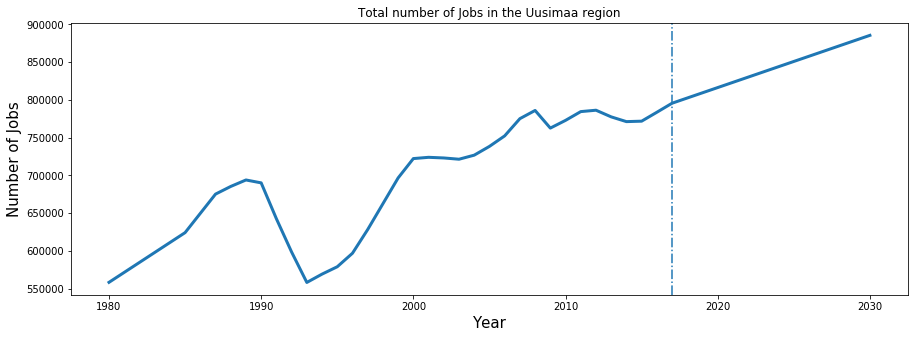

In [20]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Uusima_Ti['Year'],file_Uusima_Ti['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region')
plt.show()

Here the vertical line separates the recorded jobs and the projected jobs.

Trends in Helsinki, Espoo, Vantaa, and Kauniainen.

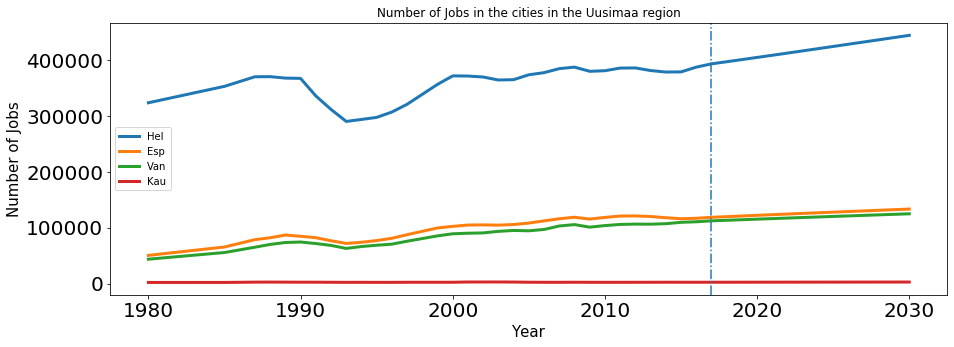

In [21]:
#HEVK_list = ['Hel','Esp','Van','Kau']
#for city in HEVK_list:
#  plt.plot(file_Uusima_Ti['Year'],file_Uusima_Ti[city],linewidth=3,label=city)
file[file['Industry']=='Total industries'][['Year','Hel','Esp','Van','Kau']].set_index('Year').plot(fontsize=20,linewidth=3,figsize=(15,5))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region')
plt.show()

We used the percentage as below with the stacked bar chart, to show the total percentage increase in the number of jobs in the cities in increased. 
- We can also see that the numbers of job in Helsinki increased but relatively, they accounted less percentage than before which means Espoo and Vantaa are developing in a better rate

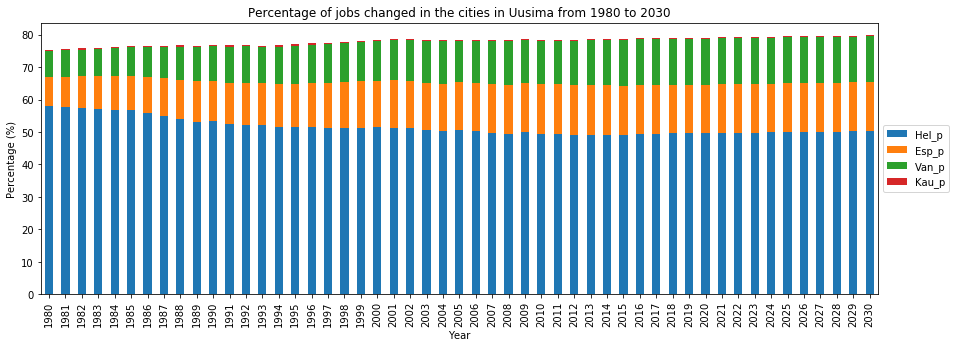

In [22]:
file_p = file[file['Industry']=='Total industries'].set_index('Year').loc[:,'Hel_p':'Kau_p']
file_p
file_p.plot(kind="bar", stacked=True,figsize= (15,5))
plt.title("Percentage of jobs changed in the cities in Uusima from 1980 to 2030")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend (loc='center left',bbox_to_anchor=(1, 0.5))

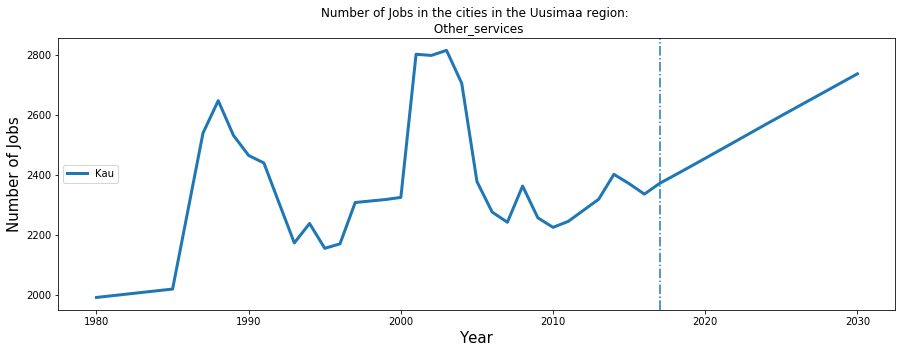

In [23]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Uusima_Ti['Year'],file_Uusima_Ti['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: \n Other_services')
plt.show()

Conclusion - trends in PKS: The jobs in the PKS region increases all the time. However, the job percentage in Helsinki decreases, while the job percentage in other cities increases over the years.

### Trends for other cities

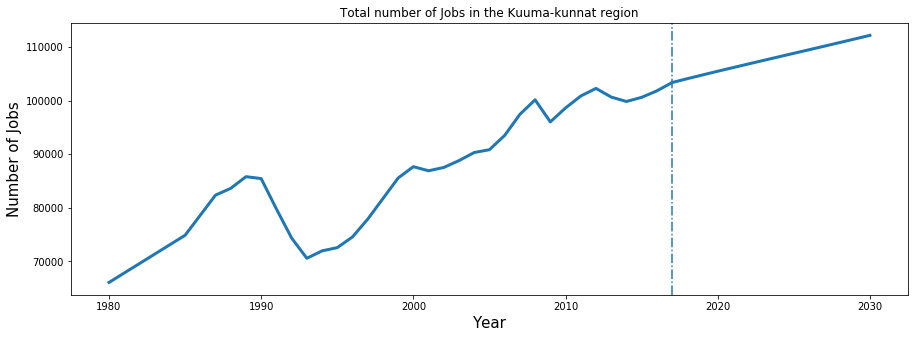

In [24]:
#Line plot for the Kehys column
fig = plt.figure(figsize=(15,5))
plt.plot(file_Uusima_Ti['Year'],file_Uusima_Ti['Kehys'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Kuuma-kunnat region')
plt.show()

<Figure size 1080x360 with 0 Axes>

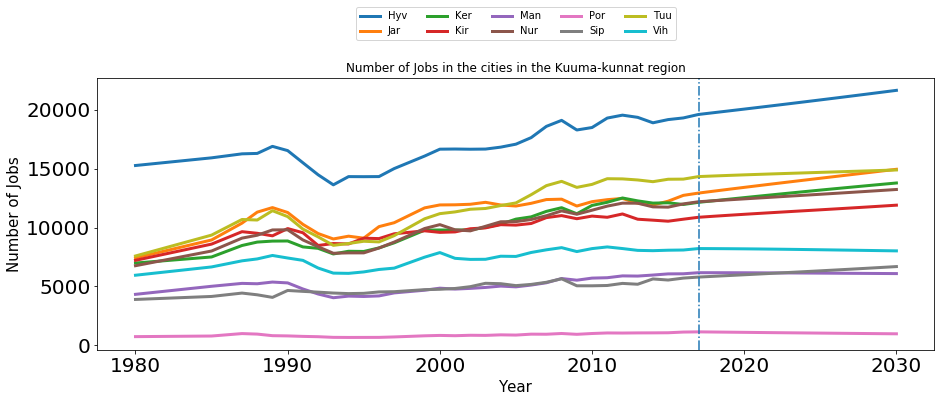

In [25]:
#Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
#for city in Kehys_cities:
#  plt.plot(file_Uusima_Ti['Year'],file_Uusima_Ti[city],linewidth=3,label=city)
fig = plt.figure(figsize=(15,5))
file[file['Industry']=='Total industries'][['Year','Hyv', 'Jar', 'Ker','Kir', 'Man', 'Nur', 'Por', 'Sip', 'Tuu', 'Vih']].set_index('Year').plot(fontsize=20,linewidth=3,figsize=(15,5))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=5,fontsize=10)
plt.show()

Conclusion - trends in Kehys: The number of jobs increases all the time.

Conclusion - Total industies: The number of jobs in terms of total industies increases almost monotoneously. It is also instructive to examine the number of jobs in each industry.

### **Number of jobs for each industry** 

In [26]:
def f(x):
    tidy_file_uus=tidy_file[tidy_file['Area']==x]
    uus_df=tidy_file_uus[tidy_file_uus['Industry']!='Total industries'][['Industry','Year','Number of jobs']]\
    .pivot(index='Year',columns='Industry',values='Number of jobs')
    uus_ind=uus_df.plot(kind='bar',figsize=(30,5),fontsize=30,stacked=True)
    uus_ind.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=4,fontsize=20)
    uus_ind.set_xlabel('Year',fontsize=30);
    uus_ind.set_ylabel('Number of jobs',fontsize=30);
    uus_ind.get_xticklabels()[37].set_color("red")
interactive_plot = interactive(f, x=list(tidy_file['Area'].unique()))
interactive_plot

interactive(children=(Dropdown(description='x', options=('Uusimaa', 'Hel', 'Esp', 'Van', 'Kau', 'PKS', 'Hyv', …

In [27]:
def f2(x):
    tidy_file_uus1=tidy_file[tidy_file['Industry']==x]
    tidy_file_uus2=tidy_file_uus1[tidy_file_uus1['Area']!='Uusimaa']
    tidy_file_uus3=tidy_file_uus2[tidy_file_uus2['Area']!='PKS']
    tidy_file_uus4=tidy_file_uus3[tidy_file_uus3['Area']!='Kehys']
    uus_df=tidy_file_uus4[['Area','Year','Number of jobs']]\
    .pivot(index='Year',columns='Area',values='Number of jobs')
    uus_ind=uus_df.plot(kind='bar',figsize=(30,5),fontsize=30,stacked=True)
    uus_ind.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=10,fontsize=20)
    uus_ind.set_xlabel('Year',fontsize=30);
    uus_ind.set_ylabel('Number of jobs',fontsize=30);
    uus_ind.get_xticklabels()[37].set_color("red")
interactive_plot2 = interactive(f2, x=list(tidy_file['Industry'].unique()))
interactive_plot2

interactive(children=(Dropdown(description='x', options=('Total industries', 'Production', 'Manufacture', 'Con…

Conclusion - in terms of each industry and for each city: some industies increases in some cities, while some other industries decreases in some other cities. For example:
- Businuess services increases over the years in the Helsinki, while Manufacture decreases in Hyvinkä.
- Production decreases in all the cities, while public administration increases in all the cities.

Below, we examine each industry separately.

### **Production: Analyzing trends in the Uusimaa region**

In [28]:
file[file['Industry']=='Total industries'].head()
file_production = file[file['Industry']=='Production'].loc[:,'Year':'Porv']
file_production.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
51,1980,14407.22850,506.06460,328.0,433.82990,23.78160,1291.67610,531.12240,59.45400,41.6178,...,783.8019,301.23360,558.8676,465.7230,956.21850,5153.67090,1786.59270,2266.18830,1744.97490,2164.12560
52,1981,14112.43114,525.49902,327.8,426.77894,23.18706,1303.26502,516.85344,61.23762,41.6178,...,765.9657,296.47728,543.0132,458.7867,925.30242,5039.12286,1742.39856,2204.55432,1710.09522,2112.99516
53,1982,13817.63378,544.93344,327.6,419.72798,22.59252,1314.85394,502.58448,63.02124,41.6178,...,748.1295,291.72096,527.1588,451.8504,894.38634,4924.57482,1698.20442,2142.92034,1675.21554,2061.86472
54,1983,13522.83642,564.36786,327.4,412.67702,21.99798,1326.44286,488.31552,64.80486,41.6178,...,730.2933,286.96464,511.3044,444.9141,863.47026,4810.02678,1654.01028,2081.28636,1640.33586,2010.73428
55,1984,13228.03906,583.80228,327.2,405.62606,21.40344,1338.03178,474.04656,66.58848,41.6178,...,712.4571,282.20832,495.4500,437.9778,832.55418,4695.47874,1609.81614,2019.65238,1605.45618,1959.60384


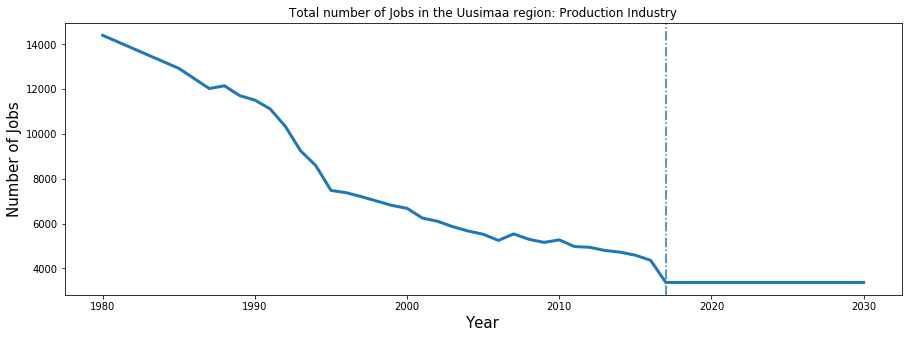

In [29]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_production['Year'],file_production['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Production Industry')
plt.show()

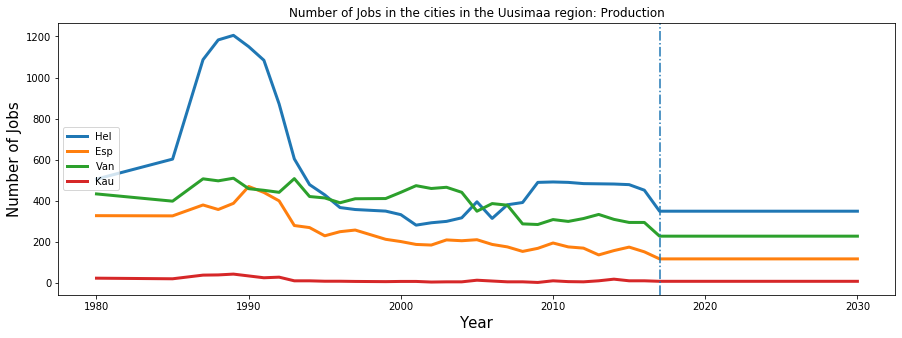

In [30]:
HEVK_list = ['Hel','Esp','Van','Kau']


fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_production['Year'],file_production[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Production')
plt.show()

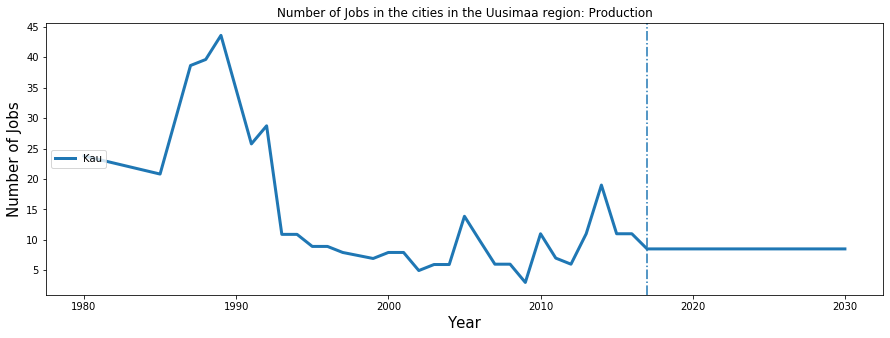

In [31]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_production['Year'],file_production['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Production')
plt.show()

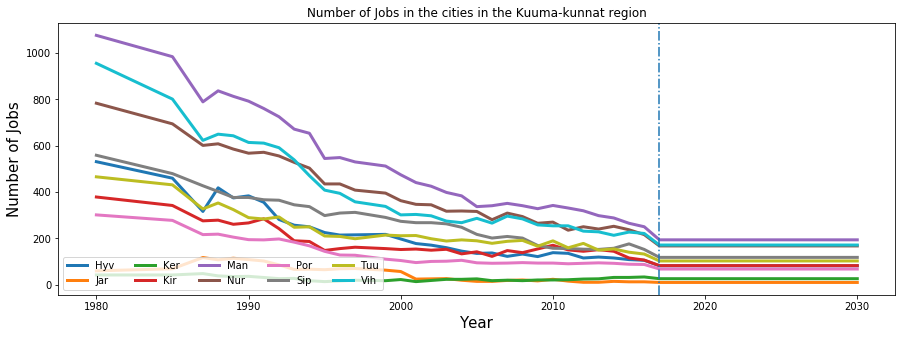

In [32]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_production['Year'],file_production[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region')
plt.show()

Conclusion: 
The number of jobs in Production in Uusimaa regions decreased significantly from 1980

### **Manufacturing: Analyzing trends in the Uusimaa region**

In [33]:
file_manufacture = file[file['Industry']=='Manufacture'].loc[:,'Year':'Porv']
file_manufacture.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
102,1980,112445.72450,42776.24660,10355.9643,11355.44760,57.3330,64544.99150,5964.6090,2538.4680,2385.2505,...,1935.4830,136.4130,668.2260,2250.8145,1766.4495,21568.0815,8013.7695,7675.7025,3105.8670,7537.3125
103,1981,113274.65672,42841.98926,10656.9342,11889.43236,67.0203,65455.37612,5896.0071,2568.7161,2341.5588,...,2008.2366,138.5877,692.1477,2397.1125,1792.7436,21783.7722,7853.8302,7625.8821,3082.5384,7473.2577
104,1982,114103.58894,42907.73192,10957.9041,12423.41712,76.7076,66365.76074,5827.4052,2598.9642,2297.8671,...,2080.9902,140.7624,716.0694,2543.4105,1819.0377,21999.4629,7693.8909,7576.0617,3059.2098,7409.2029
105,1983,114932.52116,42973.47458,11258.8740,12957.40188,86.3949,67276.14536,5758.8033,2629.2123,2254.1754,...,2153.7438,142.9371,739.9911,2689.7085,1845.3318,22215.1536,7533.9516,7526.2413,3035.8812,7345.1481
106,1984,115761.45338,43039.21724,11559.8439,13491.38664,96.0822,68186.52998,5690.2014,2659.4604,2210.4837,...,2226.4974,145.1118,763.9128,2836.0065,1871.6259,22430.8443,7374.0123,7476.4209,3012.5526,7281.0933


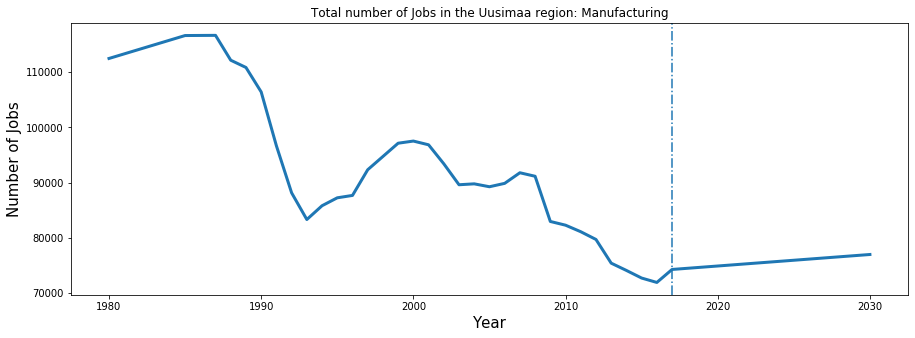

In [34]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_manufacture['Year'],file_manufacture['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Manufacturing')
plt.show()

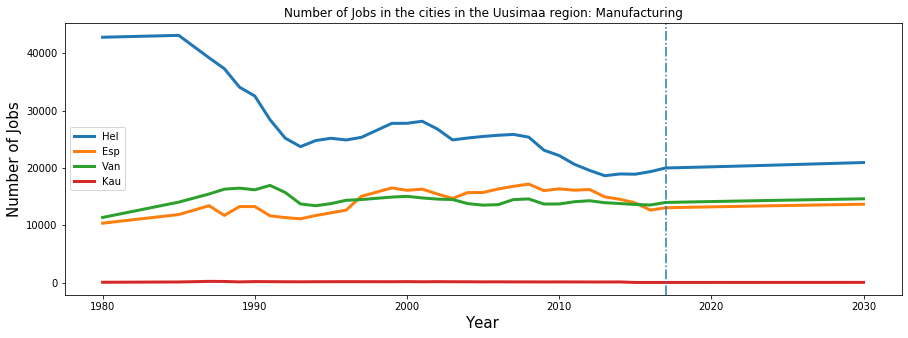

In [35]:
HEVK_list = ['Hel','Esp','Van','Kau']
fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_manufacture['Year'],file_manufacture[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Manufacturing')
plt.show()

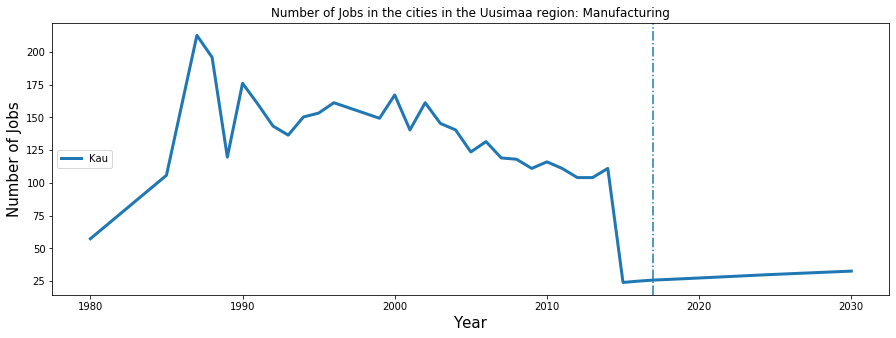

In [36]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_manufacture['Year'],file_manufacture['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Manufacturing')
plt.show()

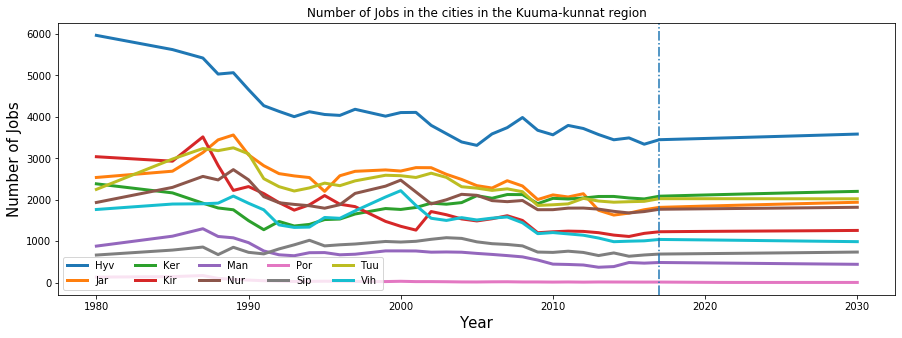

In [37]:
fig = plt.figure(figsize=(15,5))
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
for city in Kehys_cities:
  plt.plot(file_manufacture['Year'],file_manufacture[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region')
plt.show()

Conclusion: the number of jobs in Manufacture industry in Uusimaa regions decreased significantly from 1980 onwards. 

### **Construction: Analyzing trends in the Uusimaa region**

In [38]:
file_Construction = file[file['Industry']=='Construction'].loc[:,'Year':'Porv']
file_Construction.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
153,1980,37669.77210,20178.95220,3581.79690,3975.5070,175.0530,27911.30910,1047.3510,563.7300,606.257,...,683.3990,39.5600,237.3600,748.6730,527.1370,5285.2160,961.3080,1367.7870,594.3890,1549.7630
154,1981,39929.49322,21376.89576,3924.31336,4069.9179,166.3498,29537.47682,1129.2402,662.0366,626.037,...,722.3656,43.3182,260.5026,794.3648,556.2136,5713.6508,1032.3182,1446.5114,575.7958,1623.7402
155,1982,42189.21434,22574.83932,4266.82982,4164.3288,157.6466,31163.64454,1211.1294,760.3432,645.817,...,761.3322,47.0764,283.6452,840.0566,585.2902,6142.0856,1103.3284,1525.2358,557.2026,1697.7174
156,1983,44448.93546,23772.78288,4609.34628,4258.7397,148.9434,32789.81226,1293.0186,858.6498,665.597,...,800.2988,50.8346,306.7878,885.7484,614.3668,6570.5204,1174.3386,1603.9602,538.6094,1771.6946
157,1984,46708.65658,24970.72644,4951.86274,4353.1506,140.2402,34415.97998,1374.9078,956.9564,685.377,...,839.2654,54.5928,329.9304,931.4402,643.4434,6998.9552,1245.3488,1682.6846,520.0162,1845.6718


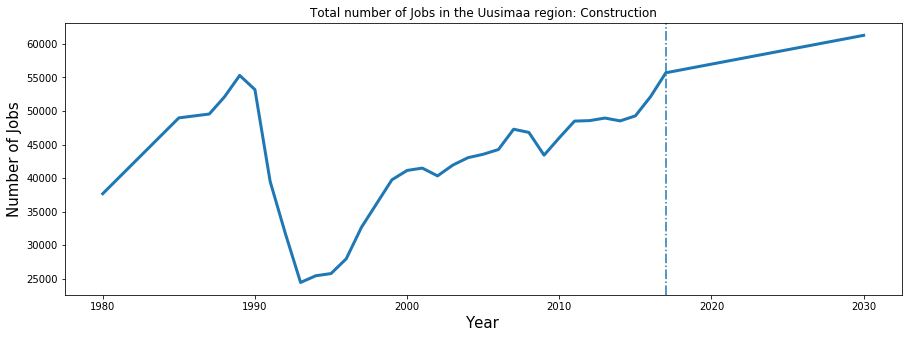

In [39]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_Construction['Year'],file_Construction['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Construction')
plt.show()

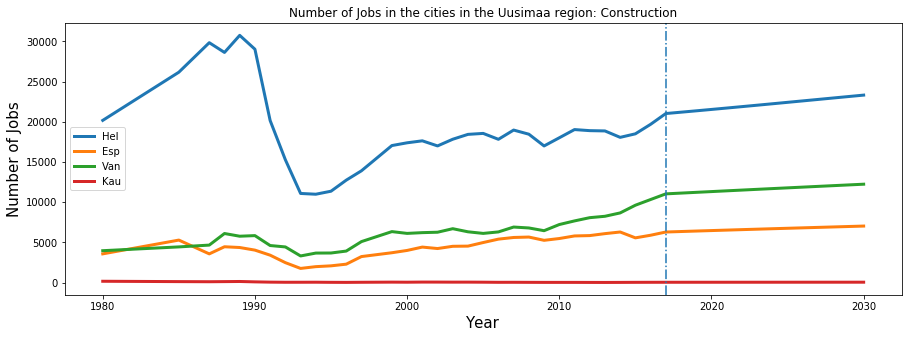

In [40]:
HEVK_list = ['Hel','Esp','Van','Kau']

fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_Construction['Year'],file_Construction[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Construction')
plt.show()

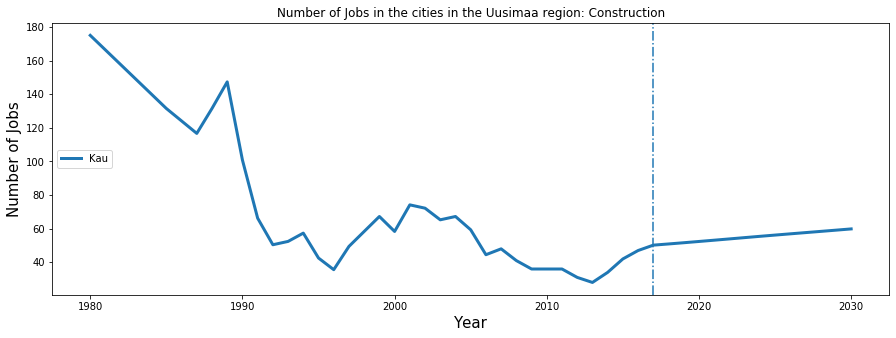

In [41]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_Construction['Year'],file_Construction['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Construction')
plt.show()

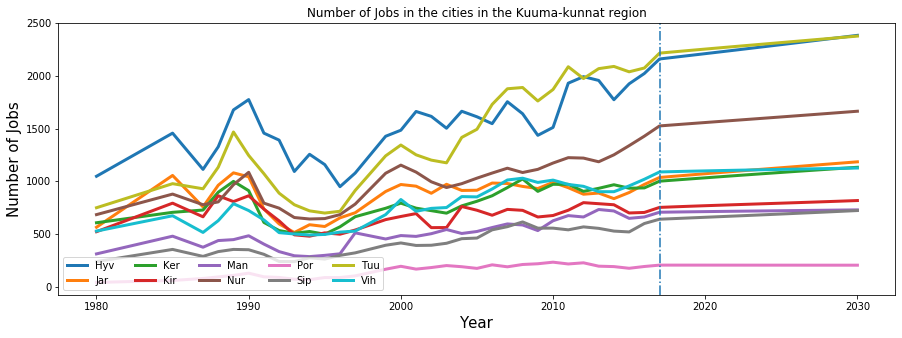

In [42]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']

fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_Construction['Year'],file_Construction[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region')
plt.show()

Conclusions: There was a constant increase from 1980 to 1990 and then there was a sharp decrease in the number of jobs in Construction in Uusimaa regions from 1990 to 2000. After that the Construction industries recovered and have been increaseing slightly every year.

### **Trade and accommodation: Analyzing trends in the Uusimaa region**

In [43]:
file_Trade_and_accomodation = file[file['Industry']=='Trade and accomodation'].loc[:,'Year':'Porv']
file_Trade_and_accomodation.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
204,1980,102579.2874,67984.09920,9942.07920,7941.30660,286.91920,86154.40420,2087.85840,1289.64720,1023.57680,...,640.35600,32.76240,318.6888,919.33280,607.59360,8022.81680,2241.74240,2566.38800,1049.38960,2544.5464
205,1981,105772.8884,68875.75584,10887.79404,8855.14444,294.06736,88912.76168,2125.78336,1320.02688,1082.94624,...,690.79024,35.54224,333.5808,976.31952,646.11424,8429.66624,2230.42448,2625.75744,1022.78256,2551.4960
206,1982,108966.4894,69767.41248,11833.50888,9768.98228,301.21552,91671.11916,2163.70832,1350.40656,1142.31568,...,741.22448,38.32208,348.4728,1033.30624,684.63488,8836.51568,2219.10656,2685.12688,996.17552,2558.4456
207,1983,112160.0904,70659.06912,12779.22372,10682.82012,308.36368,94429.47664,2201.63328,1380.78624,1201.68512,...,791.65872,41.10192,363.3648,1090.29296,723.15552,9243.36512,2207.78864,2744.49632,969.56848,2565.3952
208,1984,115353.6914,71550.72576,13724.93856,11596.65796,315.51184,97187.83412,2239.55824,1411.16592,1261.05456,...,842.09296,43.88176,378.2568,1147.27968,761.67616,9650.21456,2196.47072,2803.86576,942.96144,2572.3448


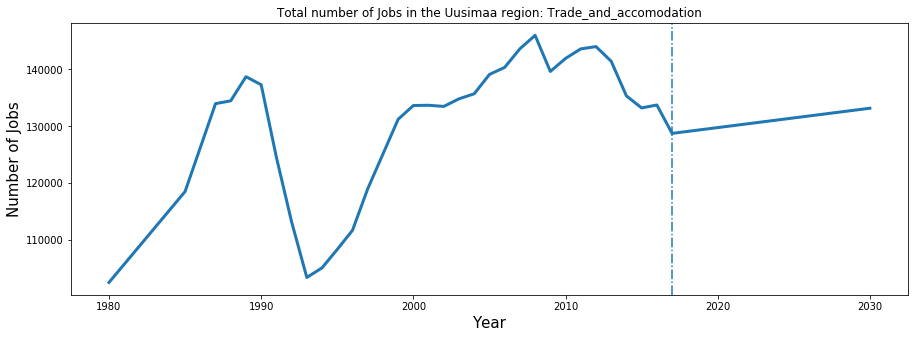

In [44]:
fig = plt.figure(figsize=(15,5))

plt.plot(file_Trade_and_accomodation['Year'],file_Trade_and_accomodation['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Trade_and_accomodation')
plt.show()

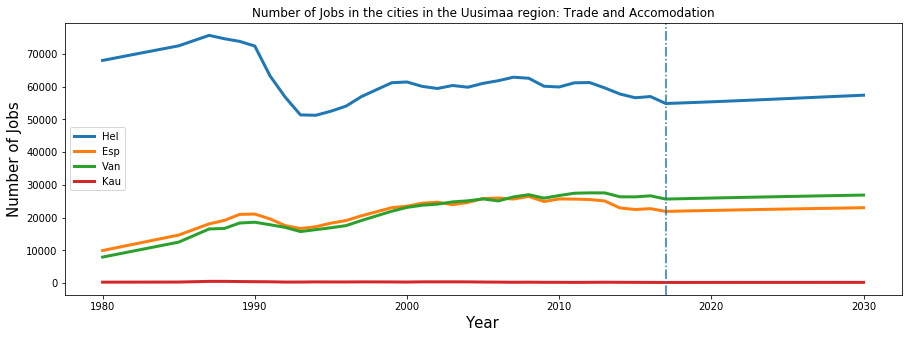

In [45]:
HEVK_list = ['Hel','Esp','Van','Kau']

fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_Trade_and_accomodation['Year'],file_Trade_and_accomodation[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Trade and Accomodation')
plt.show()

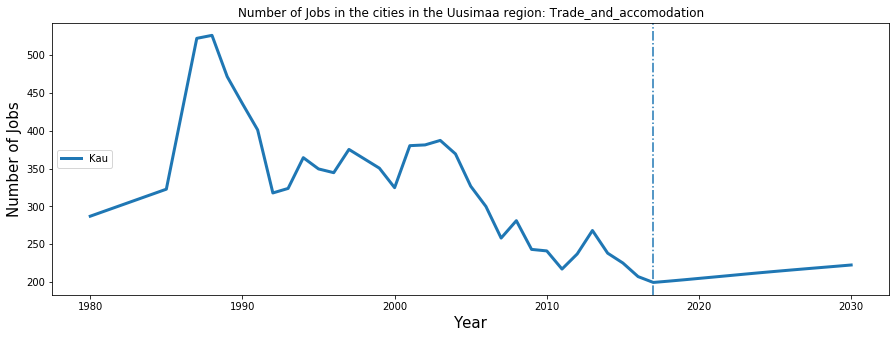

In [46]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Trade_and_accomodation['Year'],file_Trade_and_accomodation['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Trade_and_accomodation')
plt.show()

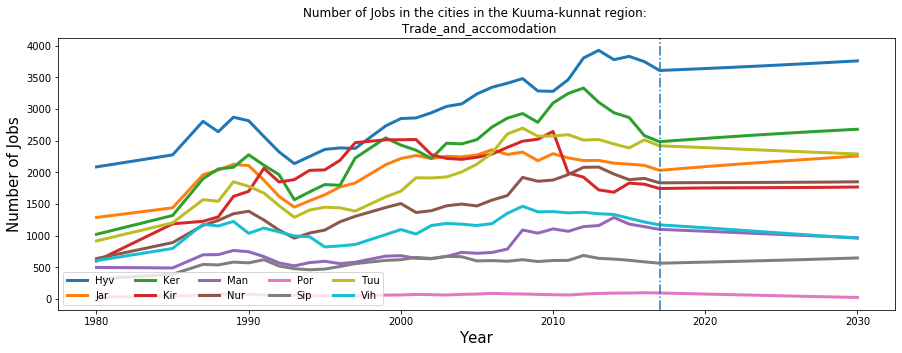

In [47]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
fig = plt.figure(figsize=(15,5))

for city in Kehys_cities:
  plt.plot(file_Trade_and_accomodation['Year'],file_Trade_and_accomodation[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region: \n Trade_and_accomodation')
plt.show()

Conclusion: The number of jobs in Trade and Accomodation industry in Uusimaa regions increased from 1980 to 1990 and there was a sharp decrease from 1990 to around 1992. Fortunately, the trend recovered and flutuated little every year with a possitive uptrend until 2010. After 2010, the trend started going down slowly

### **Transport: Analyzing trends in the Uusimaa region**

In [48]:
file_Transport = file[file['Industry']=='Transport'].loc[:,'Year':'Porv']
file_Transport.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
255,1980,42013.24440,23851.44960,1817.73220,6562.725,110.27220,32342.17900,1141.41400,390.78920,513.6363,...,578.44540,64.80910,368.54130,505.89790,302.76490,4486.3374,1827.22970,1055.32430,869.6027,1432.57130
256,1981,42138.58074,23944.41896,1844.27092,6688.305,105.04878,32582.04366,1134.44944,374.92548,494.2903,...,565.48358,61.32682,337.97462,498.73988,304.11912,4414.7572,1814.26788,1045.26438,848.3221,1433.92552
257,1982,42263.91708,24037.38832,1870.80964,6813.885,99.82536,32821.90832,1127.48488,359.06176,474.9443,...,552.52176,57.84454,307.40794,491.58186,305.47334,4343.1770,1801.30606,1035.20446,827.0415,1435.27974
258,1983,42389.25342,24130.35768,1897.34836,6939.465,94.60194,33061.77298,1120.52032,343.19804,455.5983,...,539.55994,54.36226,276.84126,484.42384,306.82756,4271.5968,1788.34424,1025.14454,805.7609,1436.63396
259,1984,42514.58976,24223.32704,1923.88708,7065.045,89.37852,33301.63764,1113.55576,327.33432,436.2523,...,526.59812,50.87998,246.27458,477.26582,308.18178,4200.0166,1775.38242,1015.08462,784.4803,1437.98818


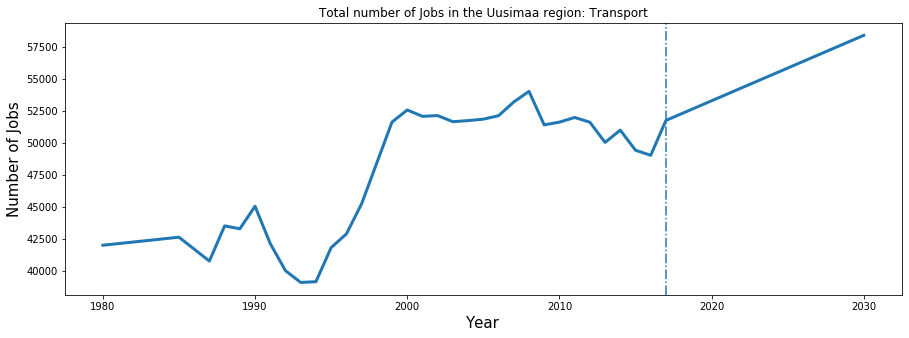

In [49]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Transport['Year'],file_Transport['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Transport')
plt.show()

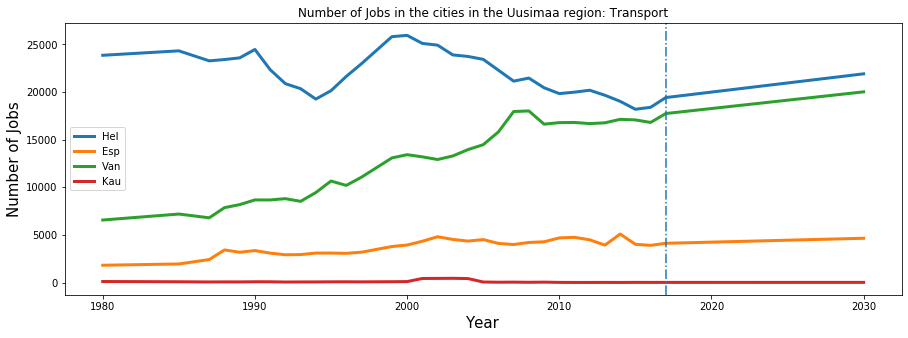

In [50]:
HEVK_list = ['Hel','Esp','Van','Kau']
fig = plt.figure(figsize=(15,5))

for city in HEVK_list:
  plt.plot(file_Transport['Year'],file_Transport[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Transport')
plt.show()

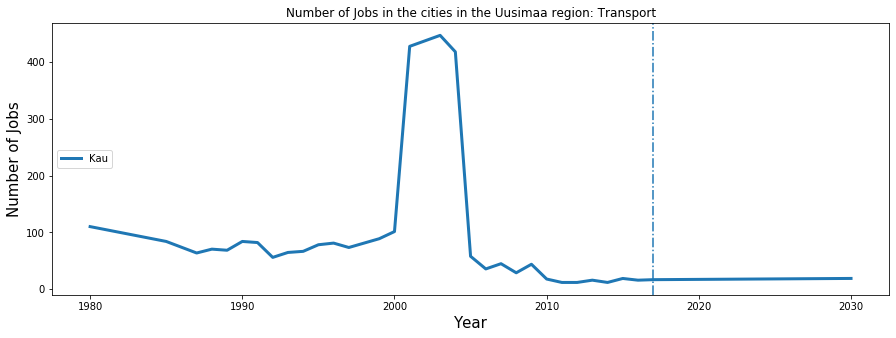

In [51]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Transport['Year'],file_Transport['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Transport')
plt.show()

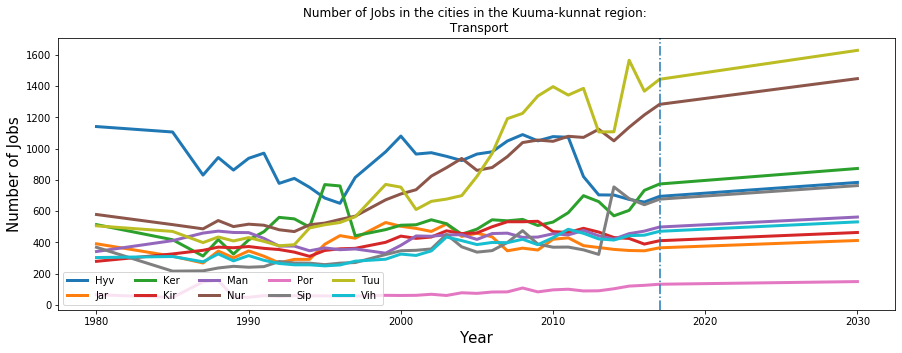

In [52]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']

fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_Transport['Year'],file_Transport[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region: \n Transport')
plt.show()

Conclusion:
The number of jobs in Transport dropped in the period of time from 1990 to 1993. After that, the industry went up gradually in the Uusimaa region in general. However, looking closer in the cities in the Kuuma-kunnat regions, the fluctuation in different cities vary quite much.


### **Business services, information, finance: Analyzing trends in the Uusimaa region**

In [53]:
file_BSIandF = file[file['Industry']=='Business services, information, finance'].loc[:,'Year':'Porv']
file_BSIandF.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
306,1980,67982.61740,51847.51140,8553.24400,2301.80820,133.11060,62835.67420,563.82620,411.2360,295.4406,...,259.72800,18.39740,72.5074,201.2892,244.57720,2395.99080,550.83980,756.45780,335.48200,1108.17280
307,1981,71665.38234,54388.16244,9101.14448,2509.45978,148.91072,66147.67742,611.01012,451.2774,328.9888,...,299.98584,19.26316,88.7404,228.3442,268.60204,2665.02572,587.41816,800.17868,334.83268,1130.24968
308,1982,75348.14728,56928.81348,9649.04496,2717.11136,164.71084,69459.68064,658.19404,491.3188,362.5370,...,340.24368,20.12892,104.9734,255.3992,292.62688,2934.06064,623.99652,843.89956,334.18336,1152.32656
309,1983,79030.91222,59469.46452,10196.94544,2924.76294,180.51096,72771.68386,705.37796,531.3602,396.0852,...,380.50152,20.99468,121.2064,282.4542,316.65172,3203.09556,660.57488,887.62044,333.53404,1174.40344
310,1984,82713.67716,62010.11556,10744.84592,3132.41452,196.31108,76083.68708,752.56188,571.4016,429.6334,...,420.75936,21.86044,137.4394,309.5092,340.67656,3472.13048,697.15324,931.34132,332.88472,1196.48032


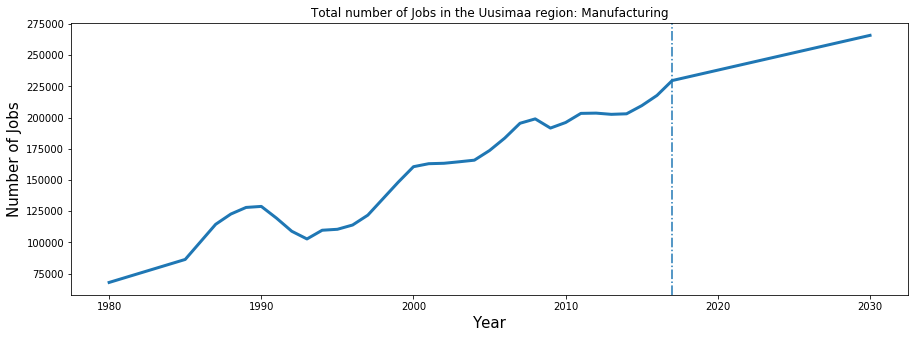

In [54]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_BSIandF['Year'],file_BSIandF['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Manufacturing')
plt.show()

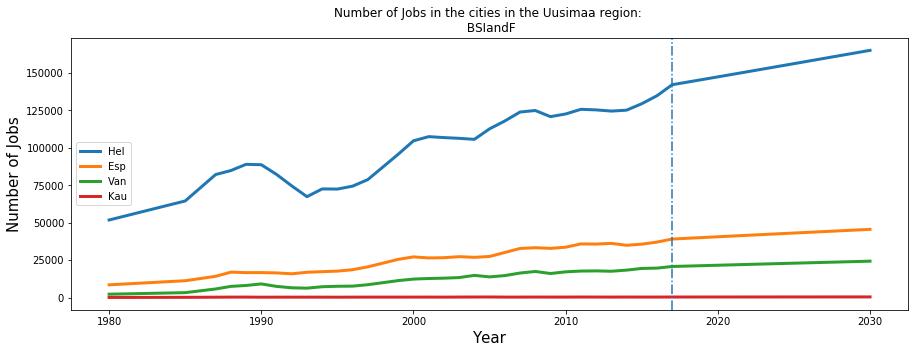

In [55]:
HEVK_list = ['Hel','Esp','Van','Kau']
fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_BSIandF['Year'],file_BSIandF[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: \n BSIandF')
plt.show()

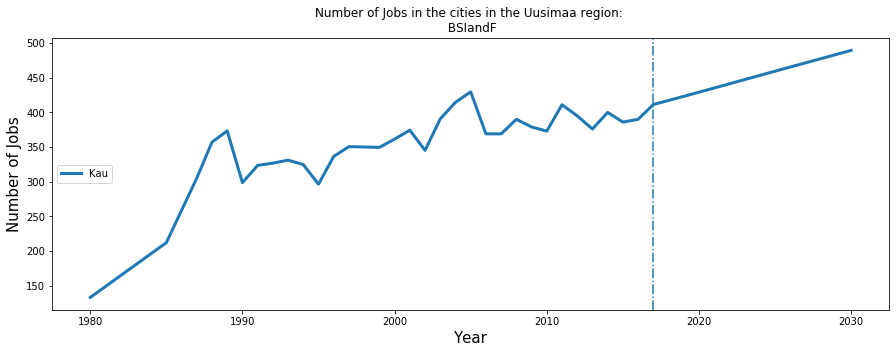

In [56]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_BSIandF['Year'],file_BSIandF['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: \n BSIandF')
plt.show()

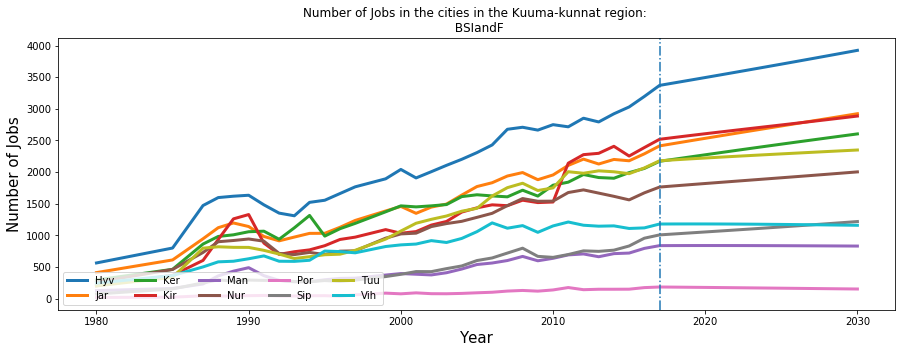

In [57]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']

fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_BSIandF['Year'],file_BSIandF[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region: \n BSIandF')
plt.show()

Conclusion:
The number of jobs in Business service, Information and Finance in Uusimaa regions went uptrend, especially the number went up from 75000 to more than 225000 jobs from 1980 to 2017

### **Public administration and welfare services: Analyzing trends in the Uusimaa region**

In [58]:
file_PAW = file[file['Industry']=='Public administration and welfare services'].loc[:,'Year':'Porv']
file_PAW.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
357,1980,132208.396045,81836.303472,13087.023192,8655.444245,1038.648426,104617.419335,3157.248097,1757.901246,1589.782532,...,1495.647975,95.949914,1340.719951,2027.764849,1203.400364,15297.969635,4089.391429,3475.835283,1343.534761,3384.245603
358,1981,136468.241513,83646.046245,13902.572669,9203.887902,1031.091424,107783.598239,3243.682935,1891.283900,1658.247619,...,1577.891262,104.248285,1368.453008,2126.864815,1257.372069,16002.949830,4180.144461,3676.617898,1338.687736,3486.243349
359,1982,140728.086982,85455.789018,14718.122146,9752.331559,1023.534422,110949.777144,3330.117773,2024.666554,1726.712706,...,1660.134550,112.546655,1396.186064,2225.964782,1311.343775,16707.930025,4270.897494,3877.400512,1333.840711,3588.241095
360,1983,144987.932450,87265.531791,15533.671623,10300.775216,1015.977420,114115.956049,3416.552611,2158.049209,1795.177793,...,1742.377838,120.845026,1423.919121,2325.064748,1365.315480,17412.910221,4361.650527,4078.183127,1328.993685,3690.238841
361,1984,149247.777918,89075.274563,16349.221100,10849.218874,1008.420417,117282.134954,3502.987449,2291.431863,1863.642880,...,1824.621126,129.143397,1451.652178,2424.164714,1419.287185,18117.890416,4452.403560,4278.965741,1324.146660,3792.236587


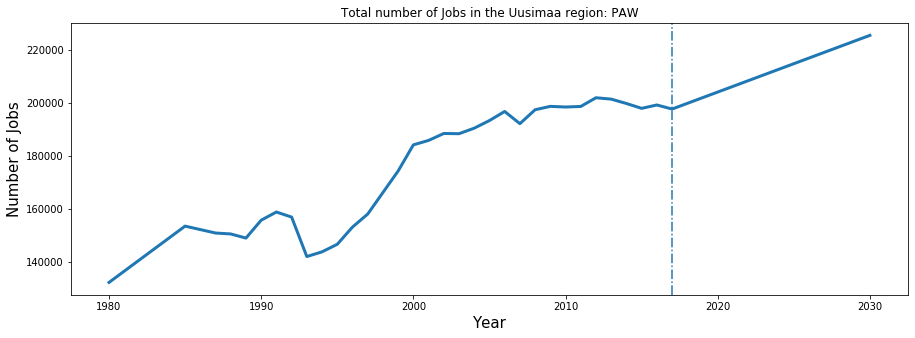

In [59]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_PAW['Year'],file_PAW['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: PAW')
plt.show()

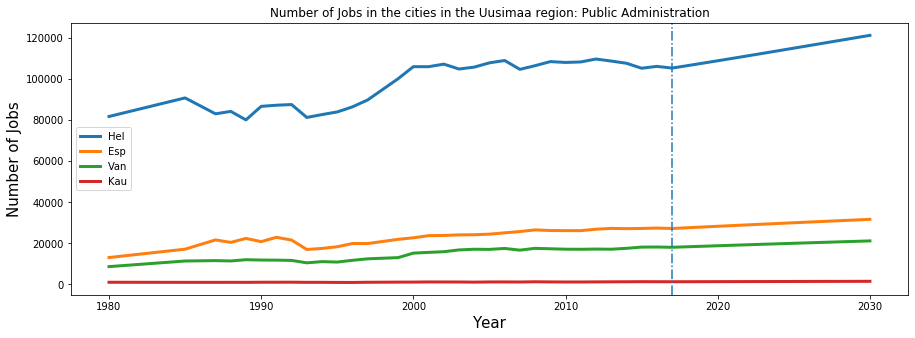

In [60]:
HEVK_list = ['Hel','Esp','Van','Kau']
fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_PAW['Year'],file_PAW[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: Public Administration')
plt.show()

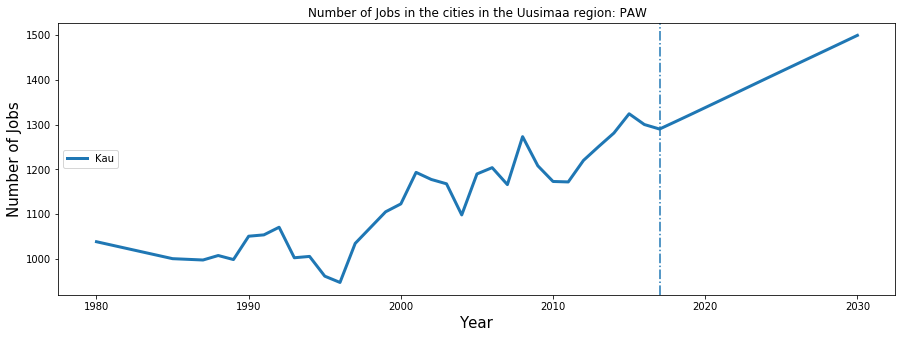

In [61]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_PAW['Year'],file_PAW['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: PAW')
plt.show()

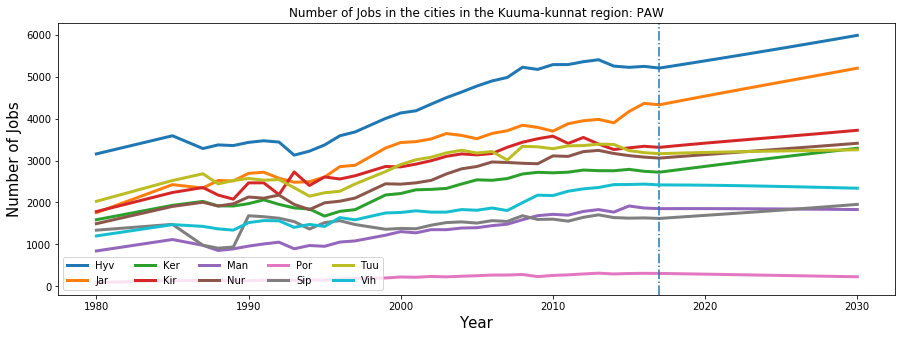

In [62]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_PAW['Year'],file_PAW[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region: PAW')
plt.show()

Conclusion: After 1992, the number of jobs in Public Administration in Uusimaa region increased slowly and constantly almost every year

### **Other services: Analyzing trends in the Uusimaa region**

In [63]:
file_Other_services = file[file['Industry']=='Other services'].loc[:,'Year':'Porv']
file_Other_services.head()

,Year,Uusimaa,Hel,Esp,Van,Kau,PKS,Hyv,Jar,Ker,...,Nur,Por,Sip,Tuu,Vih,Kehys,Raas,Lohj,Lovi,Porv
408,1980,27203.426816,17872.425384,2187.907811,1614.975264,144.285517,21819.593976,432.590871,212.679443,329.646986,...,229.696898,15.136364,207.485612,278.058498,224.681722,2321.786158,1114.285714,796.290155,431.673333,719.797480
409,1981,28033.003984,18267.659422,2324.252574,1717.306573,143.235724,22452.454292,444.433754,228.816725,343.843462,...,242.327563,16.445455,211.777492,291.647642,234.758548,2427.639874,1139.014286,842.288083,430.116000,741.491449
410,1982,28862.581152,18662.893459,2460.597336,1819.637882,142.185931,23085.314609,456.276638,244.954007,358.039938,...,254.958227,17.754545,216.069373,305.236785,244.835374,2533.493590,1163.742857,888.286010,428.558667,763.185419
411,1983,29692.158320,19058.127497,2596.942099,1921.969191,141.136138,23718.174925,468.119522,261.091289,372.236414,...,267.588892,19.063636,220.361254,318.825929,254.912199,2639.347307,1188.471429,934.283938,427.001333,784.879388
412,1984,30521.735488,19453.361535,2733.286862,2024.300500,140.086345,24351.035242,479.962405,277.228571,386.432890,...,280.219557,20.372727,224.653135,332.415072,264.989025,2745.201023,1213.200000,980.281865,425.444000,806.573357


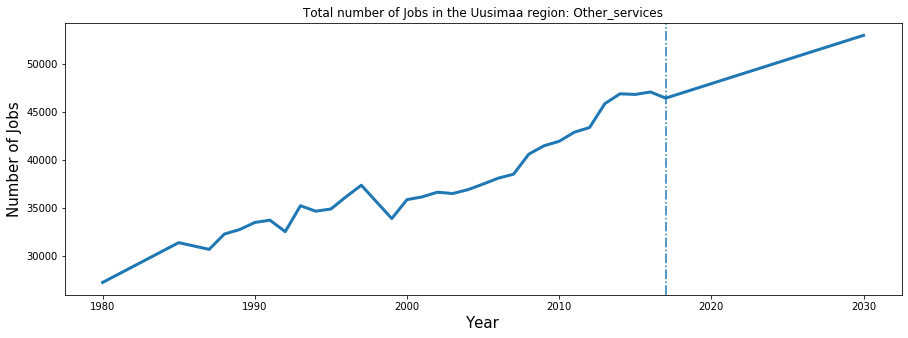

In [64]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Other_services['Year'],file_Other_services['Uusimaa'],linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.title('Total number of Jobs in the Uusimaa region: Other_services')
plt.show()

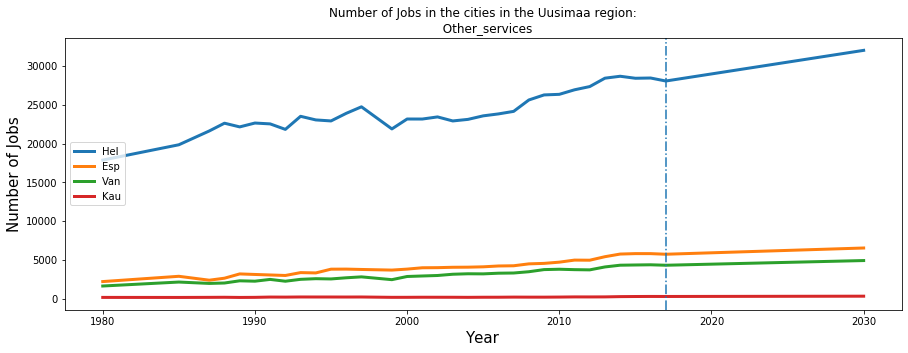

In [65]:
HEVK_list = ['Hel','Esp','Van','Kau']
fig = plt.figure(figsize=(15,5))
for city in HEVK_list:
  plt.plot(file_Other_services['Year'],file_Other_services[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region:\n  Other_services')
plt.show()

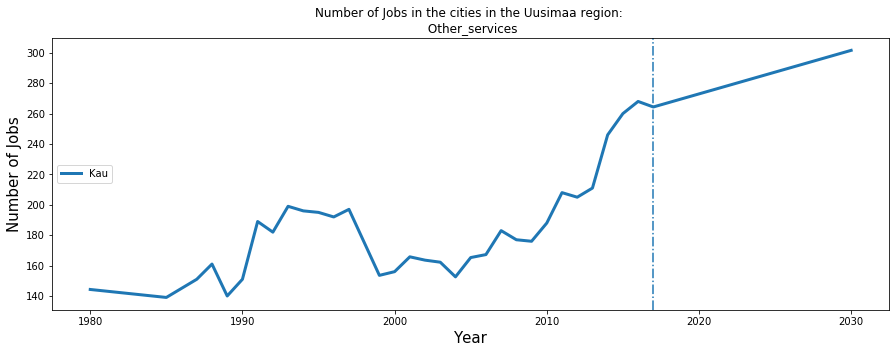

In [66]:
fig = plt.figure(figsize=(15,5))
plt.plot(file_Other_services['Year'],file_Other_services['Kau'],linewidth=3,label='Kau')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='center left')
plt.title('Number of Jobs in the cities in the Uusimaa region: \n Other_services')
plt.show()

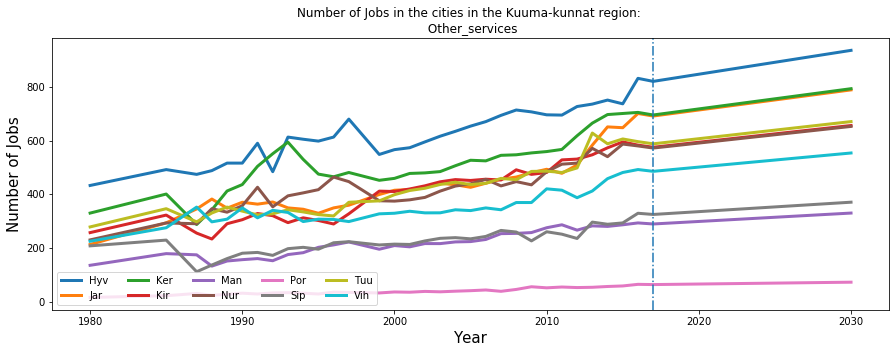

In [67]:
Kehys_cities =['Hyv','Jar','Ker','Kir','Man','Nur','Por','Sip','Tuu','Vih']#'Raas','Lohj','Lovi','Porv']
fig = plt.figure(figsize=(15,5))
for city in Kehys_cities:
  plt.plot(file_Other_services['Year'],file_Other_services[city],linewidth=3,label=city)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.axvline(x=2017,linestyle='-.')
plt.legend(loc='lower left',ncol=5)
plt.title('Number of Jobs in the cities in the Kuuma-kunnat region: \n Other_services')
plt.show()

## Increase rates for each industry

In this previous secitons, we saw that although some up and down, the overall trend in the Uusimma region is that the number of jobs are increased. In this section, we examine in which industry the number of jobs increased the most in which city.

### Increase rates for each industry in three big cities

In [68]:
tidy_filen=tidy_file[tidy_file['Industry']!='Total industries']
tidy_rate=tidy_filen[['Industry','Year','Area','Number of jobs']].groupby(['Industry','Area']).mean()
tidy_rate['Number of jobs']=(tidy_file[['Industry','Year','Area','Number of jobs']].groupby(['Industry','Area']).max()['Number of jobs']\
-tidy_file[['Industry','Year','Area','Number of jobs']].groupby(['Industry','Area']).min()['Number of jobs'])/50
tidy_rate=tidy_rate.drop('Year',axis=1)

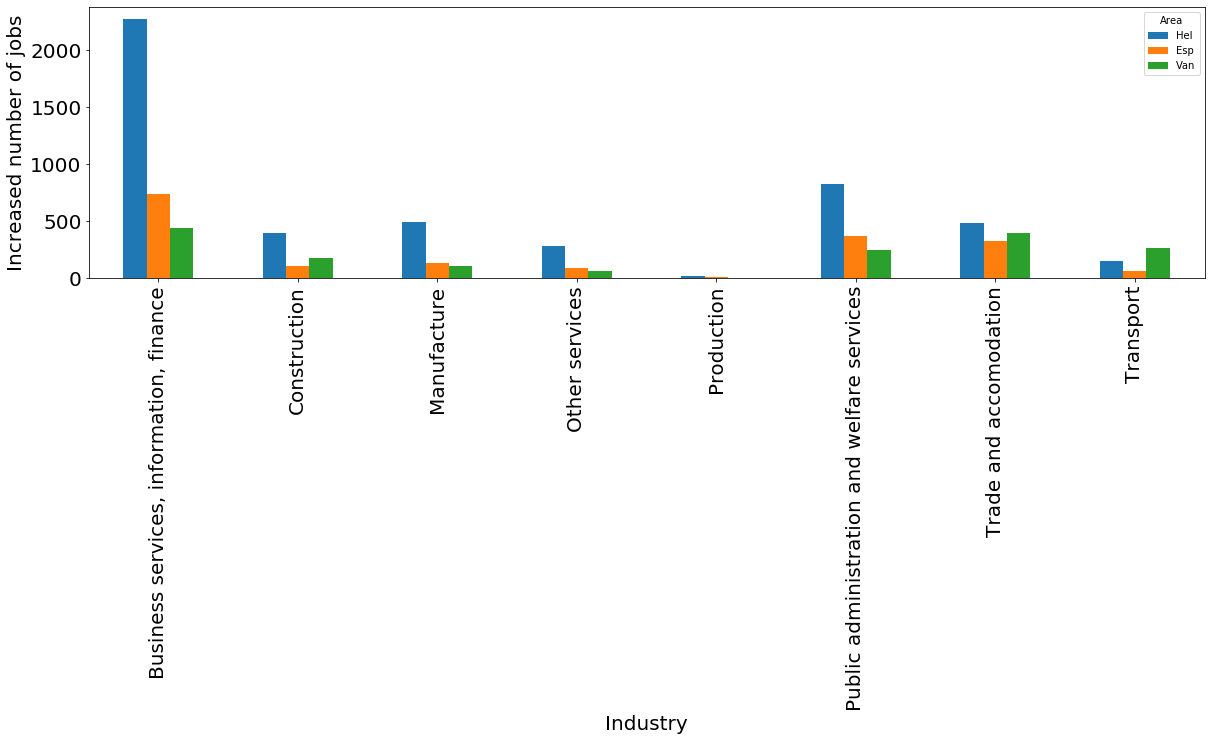

In [69]:
tidy_rate_plot1=tidy_rate.unstack()['Number of jobs'].drop(['Kehys','PKS','Uusimaa'],axis=1)[['Hel','Esp','Van']].plot.bar(figsize=(20,5),fontsize=20)
tidy_rate_plot1.set_ylabel('Increased number of jobs',fontsize=20);
tidy_rate_plot1.set_xlabel('Industry',fontsize=20);

### Increase rates of each industry for other cities

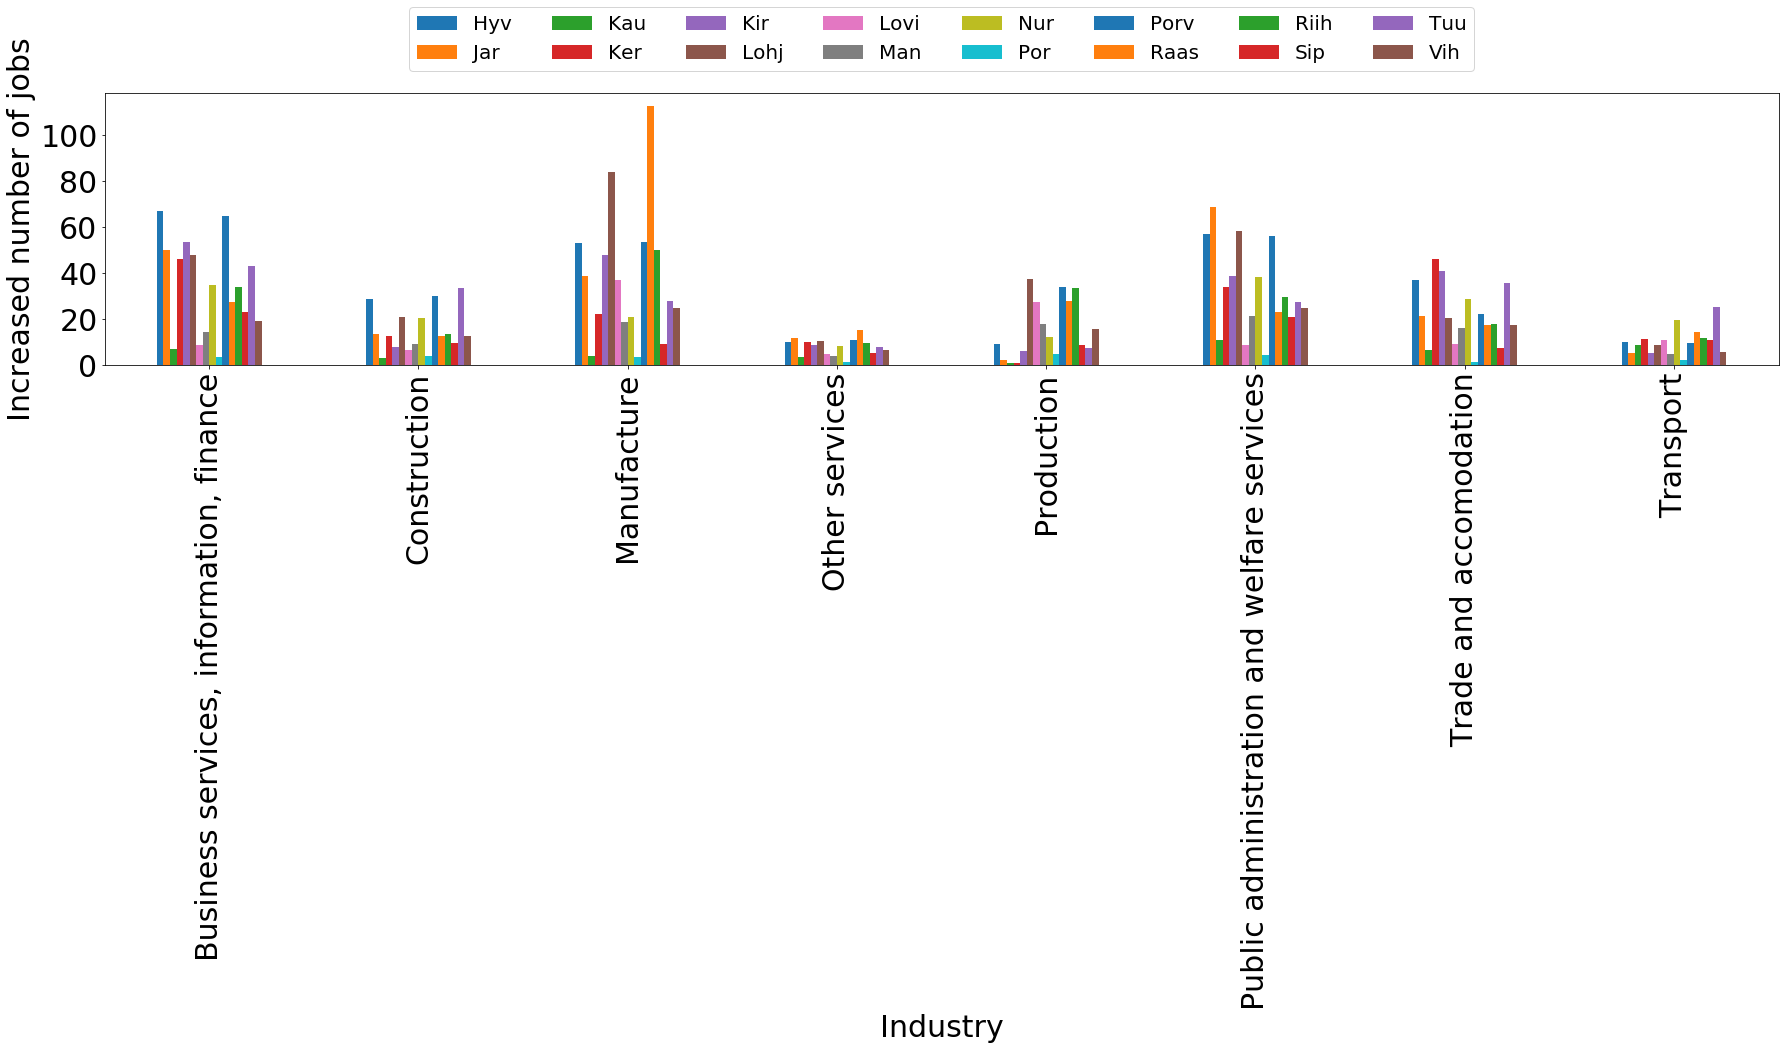

In [70]:
tidy_rate_plot2=tidy_rate.unstack()['Number of jobs'].drop(['Kehys','PKS','Uusimaa','Hel','Esp','Van'],axis=1).plot.bar(figsize=(30,5),fontsize=30)
tidy_rate_plot2.legend(loc='center', bbox_to_anchor=(0.5, 1.2),ncol=8,fontsize=20)
tidy_rate_plot2.set_ylabel('Increased number of jobs',fontsize=30);
tidy_rate_plot2.set_xlabel('Industry',fontsize=30);

Conclusion: 
- In the big cities, Business services increased the most. 
- In the small cities, Manufacture and Public administration services increased the most.

## Correlations and distributions

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

In [72]:
#Data Frame to be Unmelted
columns = ['Industry','Year','Uusimaa', 	'Hel', 'Esp', 'Van', 'Kau']
file_tobeUnMelted = file[columns]
file_tobeUnMelted


,Industry,Year,Uusimaa,Hel,Esp,Van,Kau
0,Total industries,1980,558332.000000,324152.000000,50515.000000,43671.000000,1991.000000
1,Total industries,1981,571505.600000,330042.400000,53523.400000,46063.200000,1996.600000
2,Total industries,1982,584679.200000,335932.800000,56531.800000,48455.400000,2002.200000
3,Total industries,1983,597852.800000,341823.200000,59540.200000,50847.600000,2007.800000
4,Total industries,1984,611026.400000,347713.600000,62548.600000,53239.800000,2013.400000
...,...,...,...,...,...,...,...
454,Other services,2026,50932.571594,30820.030515,6274.004175,4714.976390,290.152393
455,Other services,2027,51435.604755,31124.423105,6335.969083,4761.543634,293.018070
456,Other services,2028,51938.637916,31428.815695,6397.933992,4808.110878,295.883746
457,Other services,2029,52441.671077,31733.208285,6459.898901,4854.678121,298.749423


In [73]:
#Creating a data frame for different industries in Uusimaa- cities excluded
df_unmelted = file_tobeUnMelted.pivot(index='Year',columns='Industry', values='Uusimaa')
df_unmelted.tail()

Industry,"Business services, information, finance",Construction,Manufacture,Other services,Production,Public administration and welfare services,Total industries,Trade and accomodation,Transport
Year,,,,,,,,,
2026,254658.588059,59548.212522,76171.152786,50932.571594,3377.307304,217075.268453,857934.693009,131818.499449,56357.341968
2027,257441.491084,59977.017568,76379.189489,51435.604755,3377.307304,219219.202188,864852.195596,132158.423688,56868.208646
2028,260224.394109,60405.822615,76587.226192,51938.637916,3377.307304,221363.135923,871769.698184,132498.347926,57379.075324
2029,263007.297134,60834.627662,76795.262895,52441.671077,3377.307304,223507.069658,878687.200771,132838.272165,57889.942002
2030,265790.200160,61263.432708,77003.299597,52944.704238,3377.307304,225651.003393,885604.703359,133178.196404,58400.808681


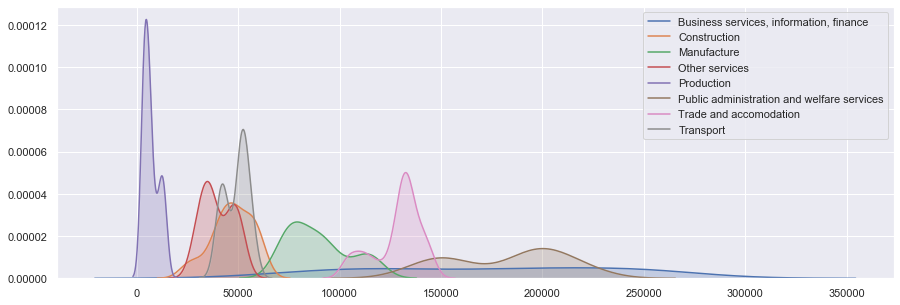

In [74]:
fig = plt.figure(figsize=(15,5))
for col in df_unmelted.columns:
  if col != 'Total industries':
    sns.kdeplot(df_unmelted[col], shade=True)

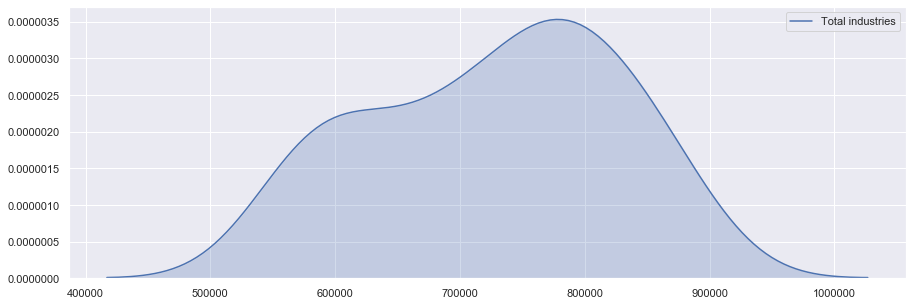

In [75]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(df_unmelted['Total industries'], shade=True)

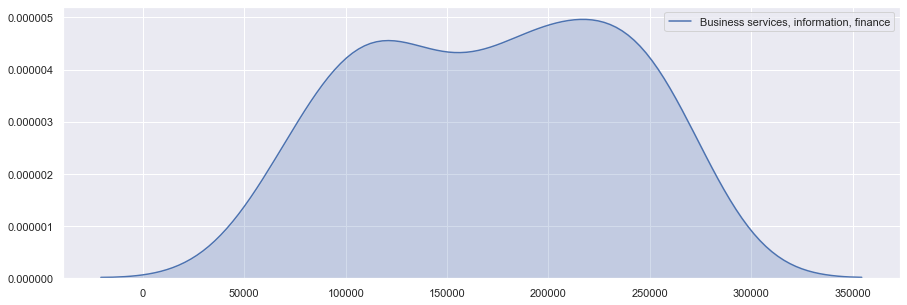

In [76]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(df_unmelted['Business services, information, finance'],shade=True)

C:\Users\ngoch\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


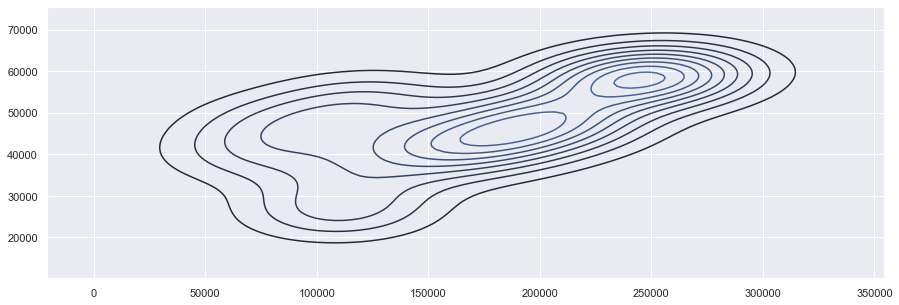

In [77]:
#kde plot for the whole data frame: two-dimensional visualization of the data:
fig = plt.figure(figsize=(15,5)) 
sns.kdeplot(df_unmelted)

## Correlation visualizations

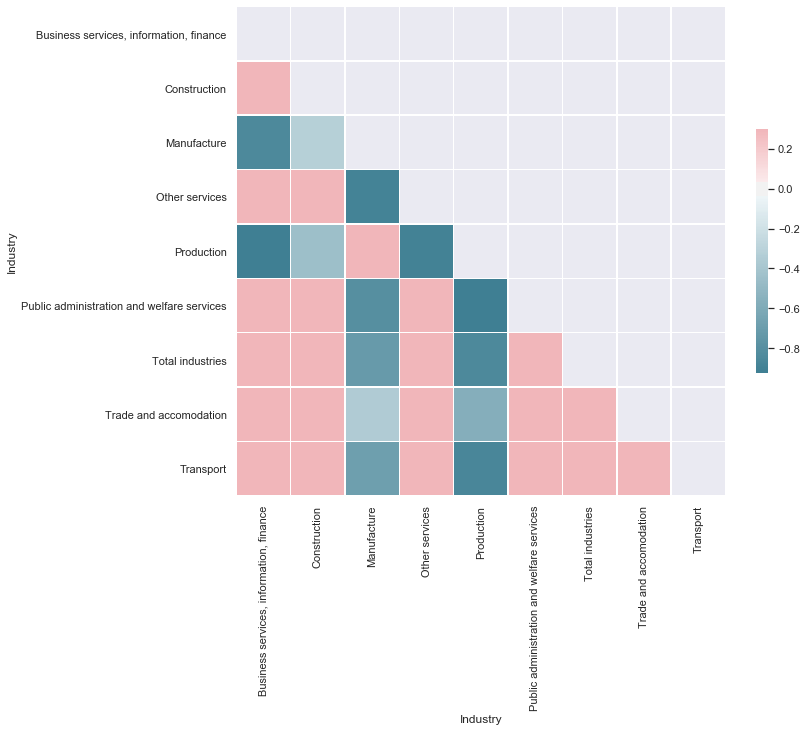

In [78]:
# df_unmelted
# Compute the correlation matrix
corr = df_unmelted.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Conclusions:
- Many industries have highly negative correlations (approximately -0.8) which mean one increases as the other decrease as following:
> Manufature **vs** Business service, information, finance\
> Production **vs** Business service, information, finance\
> Manufacture **vs** other services\
> Production **vs** other services\
> Production **vs** Public administration and welfare service\
- There are no strong possibile correlations between different industries which showed in the heatmap approximately 0.2


In [79]:
#pair plot for the number of jobs in some cities in Uusimaa region
df_cor = file[['Industry','Hel', 'Esp', 'Van', 'Kau']]
df_cor

,Industry,Hel,Esp,Van,Kau
0,Total industries,324152.000000,50515.000000,43671.000000,1991.000000
1,Total industries,330042.400000,53523.400000,46063.200000,1996.600000
2,Total industries,335932.800000,56531.800000,48455.400000,2002.200000
3,Total industries,341823.200000,59540.200000,50847.600000,2007.800000
4,Total industries,347713.600000,62548.600000,53239.800000,2013.400000
...,...,...,...,...,...
454,Other services,30820.030515,6274.004175,4714.976390,290.152393
455,Other services,31124.423105,6335.969083,4761.543634,293.018070
456,Other services,31428.815695,6397.933992,4808.110878,295.883746
457,Other services,31733.208285,6459.898901,4854.678121,298.749423


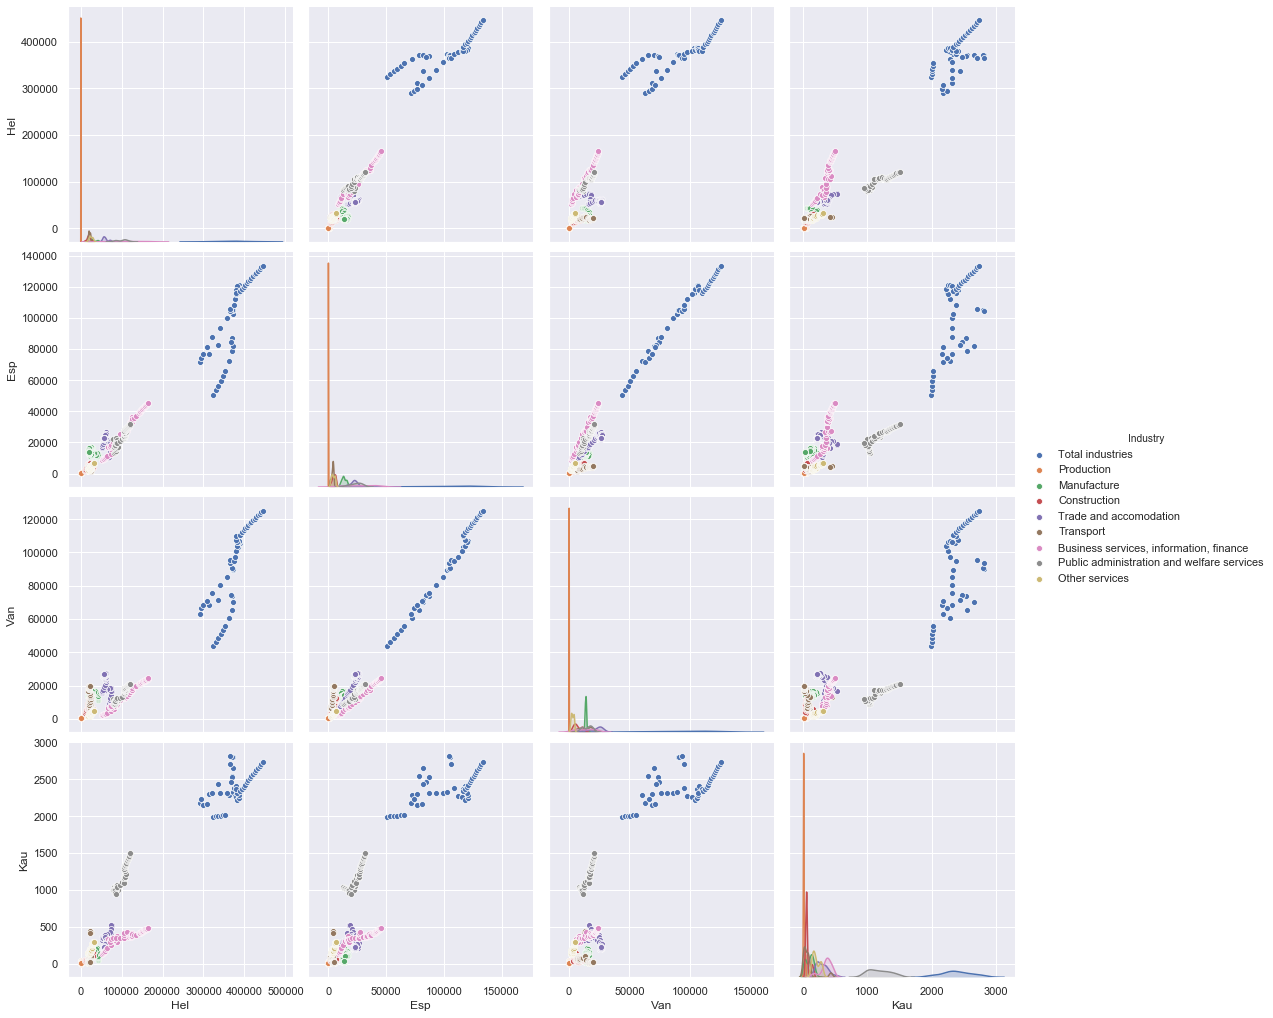

In [80]:
sns.pairplot(df_cor, hue='Industry', height=3.5);